# OCR con Tesseract

In [1]:
import tesserocr # Para hcer OCR
import numpy as np # Para hacer manipulacion basica de imagenes
import matplotlib.pyplot as plt # Para visualizar imagenes
from PIL import Image # para cambiar el formato de archivos
%matplotlib inline

In [24]:
#Lenguajes disponibles para tesserocr
tesserocr.get_languages()

('/usr/share/tesseract-ocr/4.00/tessdata/', ['eng', 'osd', 'spa'])

### Ejercicio 1

(-0.5, 685.5, 151.5, -0.5)

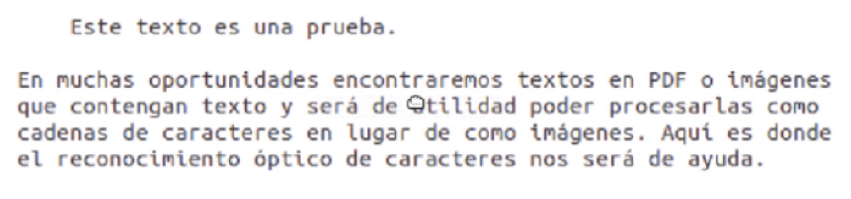

In [2]:
texto_largo = plt.imread('texto_largo.png')
plt.figure(figsize=(15,5))
plt.imshow(texto_largo)
plt.axis(False)

In [3]:
texto_ocr = tesserocr.file_to_text('texto_largo.png', lang='spa')

In [4]:
print(texto_ocr)

Este texto es una prueba.

En muchas oportunidades encontraremos textos en PDF o imágenes
que contengan texto y será de Qtilidad poder procesarlas como
cadenas de caracteres en lugar de como imágenes. Aquí es donde
el reconocimiento óptico de caracteres nos será de ayuda.



### Ejercicio 2

In [5]:
img = plt.imread('imagen de prueba.png')

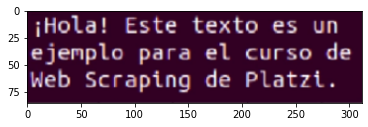

In [6]:
plt.imshow(img)

#### Primer intento imagen 

In [7]:
texto_ocr = tesserocr.file_to_text('imagen de prueba.png', lang='spa')

In [8]:
print(texto_ocr)

¡Hola! Este texto es un
ejemplo para el curso de
Web Scraping de Platzi.



La imagen muestra un fondo oscuro, un difuminado en los bordes, lo  que hace mas dificil su reconocimiento. Hacemos necesitamos, analizamo la imagen

In [9]:
img.shape

(86, 312, 4)

El ultimo digito de la tupla indica el numero  de canales rgba.


##### Primer transformacion eliminar canal alpha

In [10]:
img_rgb = img[:,:,:3]

In [11]:
img_rgb.shape

(86, 312, 3)

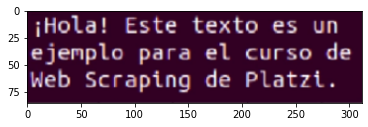

In [12]:
plt.imshow(img_rgb)

##### Segunda transformacion invertir colores de la imagen

In [13]:
img_inv = 1-img_rgb

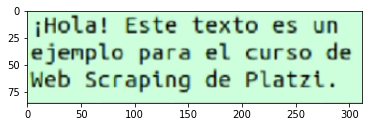

In [14]:
plt.imshow(img_inv)

##### Tercera Transformacion convertir imagen en escala de grises

In [15]:
img_gr = img_inv.mean(axis=2)

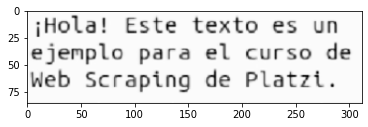

In [16]:
plt.imshow(img_gr, cmap='Greys_r')

In [17]:
try:
    tesserocr.image_to_text(img_gr, lang='spa')
except Exception as e:
    print(e)

'numpy.ndarray' object has no attribute 'save'


###### Convertimos el array a imagen con Pillow

In [18]:
img_pli = Image.fromarray(np.uint8(img_gr*255))

In [19]:
type(img_pli)

PIL.Image.Image

In [20]:
print(tesserocr.image_to_text(img_pli, lang='spa'))

¡Hola! Este texto es un
ejemplo para el curso de
Web Scraping de Platzi.



##### Test usando la imagen invertida sin escala de grises

In [21]:
img_pil_inv = Image.fromarray(np.uint8(img_inv*255))

In [22]:
print(tesserocr.image_to_text(img_pil_inv, lang='spa'))

¡Hola! Este texto es un
ejemplo para el curso de
Web Scraping de Platzi.



('/usr/share/tesseract-ocr/4.00/tessdata/', ['eng', 'osd', 'spa'])